# UNIT 6  |  Assignment -  WeatherPy
----

### Analysis

- The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
- On the Northern Hemisphere, between latitude 0 and 40 deg. there are more dry cities than in its counterpart on the southern hemisphere.
- There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness. This may be due to the scale of the instruments or methods used to measure this data.
- There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

@autor Martha Meses



In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
%matplotlib inline

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Import API key
from config import api_key
# Check API key
api_key

'72281b30332f8b81c3087397bf9791c3'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [6]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

734

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# NOTEBOOK EXAMPLE

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [7]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=72281b30332f8b81c3087397bf9791c3&units=metric&q=


In [8]:
# set up lists to hold reponse info
lat = []
lng = []
maxTemp = []
humidity = []
windSpeed = []
cloudiness = []
cityName = []
country = []
date = []

In [9]:
# Loop through the list of cities and perform a request for data on each
numberCity = 0
print("Beginning Data Retrieval")   
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windSpeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        cityName.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {numberCity} | {city} ")
        numberCity += 1
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")   
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | san juan del parana 
Processing Record 1 | cape town 
Processing Record 2 | ushuaia 
Processing Record 3 | lahaina 
Processing Record 4 | albany 
Processing Record 5 | bennington 
City not found. Skipping...
Processing Record 6 | kaitangata 
Processing Record 7 | avarua 
Processing Record 8 | broken hill 
Processing Record 9 | chapais 
Processing Record 10 | saskylakh 
Processing Record 11 | boquete 
Processing Record 12 | mahebourg 
Processing Record 13 | rikitea 
Processing Record 14 | lismore 
Processing Record 15 | faanui 
Processing Record 16 | davenda 
Processing Record 17 | komsomolskiy 
Processing Record 18 | hereford 
Processing Record 19 | jamestown 
Processing Record 20 | hermanus 
City not found. Skipping...
Processing Record 21 | kawalu 
Processing Record 22 | bluff 
Processing Record 23 | mount gambier 
Processing Record 24 | vaini 
City not found. Skipping...
Processing Record 25 | qaanaaq 
Proc

City not found. Skipping...
Processing Record 219 | ayagoz 
Processing Record 220 | bathsheba 
Processing Record 221 | ossora 
Processing Record 222 | athabasca 
Processing Record 223 | cockburn town 
Processing Record 224 | jiblah 
Processing Record 225 | ribeira grande 
City not found. Skipping...
City not found. Skipping...
Processing Record 226 | fort nelson 
Processing Record 227 | virovitica 
Processing Record 228 | gamboma 
Processing Record 229 | goure 
City not found. Skipping...
Processing Record 230 | les cayes 
City not found. Skipping...
Processing Record 231 | petropavlovsk-kamchatskiy 
Processing Record 232 | aransas pass 
City not found. Skipping...
Processing Record 233 | gravdal 
Processing Record 234 | calvia 
Processing Record 235 | gisborne 
Processing Record 236 | manggar 
Processing Record 237 | bograd 
Processing Record 238 | tarko-sale 
Processing Record 239 | mount isa 
Processing Record 240 | havelock 
Processing Record 241 | necochea 
Processing Record 242 |

Processing Record 435 | kastamonu 
Processing Record 436 | katobu 
Processing Record 437 | grindavik 
City not found. Skipping...
City not found. Skipping...
Processing Record 438 | ibimirim 
Processing Record 439 | kaeo 
Processing Record 440 | ewa beach 
Processing Record 441 | ponta delgada 
City not found. Skipping...
Processing Record 442 | turan 
Processing Record 443 | luganville 
Processing Record 444 | shimoda 
Processing Record 445 | bainbridge 
City not found. Skipping...
Processing Record 446 | soma 
Processing Record 447 | galle 
Processing Record 448 | daoukro 
Processing Record 449 | staryy nadym 
Processing Record 450 | vao 
Processing Record 451 | imeni poliny osipenko 
Processing Record 452 | batemans bay 
Processing Record 453 | pangnirtung 
Processing Record 454 | mackenzie 
Processing Record 455 | souillac 
Processing Record 456 | awjilah 
Processing Record 457 | raymond 
Processing Record 458 | vila 
Processing Record 459 | oskemen 
Processing Record 460 | pograni

### Convert Raw Data to DataFrame
* Export the city data into a .csv
* Display the DataFrame

In [4]:
# NOTEBOOK EXAMPLE

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
# NOTEBOOK EXAMPLE

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [10]:
# Create a data frame 
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp": maxTemp,
    "Wind_Speed": windSpeed   
}
weather_df = pd.DataFrame(weather_dict)

In [11]:
weather_df['Date'] = pd.to_datetime(weather_df.Date)

In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 9 columns):
City          661 non-null object
Cloudiness    661 non-null int64
Country       661 non-null object
Date          661 non-null datetime64[ns]
Humidity      661 non-null int64
Lat           661 non-null float64
Lng           661 non-null float64
Max_Temp      661 non-null float64
Wind_Speed    661 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 46.6+ KB


In [13]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,San Juan del Parana,0,PY,1970-01-01 00:00:01.556121600,62,-27.30,-55.97,30.00,4.1
1,Cape Town,20,ZA,1970-01-01 00:00:01.556125376,72,-33.93,18.42,20.56,3.6
2,Ushuaia,20,AR,1970-01-01 00:00:01.556121600,66,-54.81,-68.31,9.00,10.8
3,Lahaina,40,US,1970-01-01 00:00:01.556125240,78,20.87,-156.68,23.00,5.1
4,Albany,75,US,1970-01-01 00:00:01.556125443,57,42.65,-73.75,13.33,6.7


In [14]:
# Export to a .CSV
weather_df.to_csv("../Resources/cities.csv", index=False, encoding='utf8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

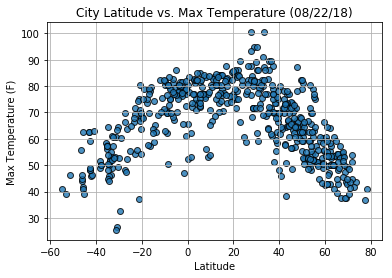

In [6]:
# NOTEBOOK EXAMPLE

In [15]:
# Assign Date for Label
dateLabel = weather_df['Date'].dt.date.max()
print(dateLabel)

1970-01-01


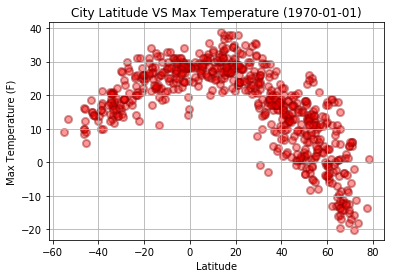

In [16]:
# Build the scatter plot
plt.scatter(weather_df.Lat,
            weather_df.Max_Temp, 
            alpha=0.4, 
            s=50, 
            c='red', 
            edgecolors="darkred", 
            linewidth=2)

# Incorporate the other graph properties
plt.grid()
# Create a legend
plt.title(f"City Latitude VS Max Temperature ({dateLabel})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

In [17]:
# Save Figure
plt.savefig('../Resources/maxTemp.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

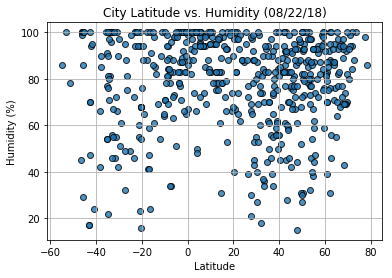

In [7]:
# NOTEBOOK EXAMPLE

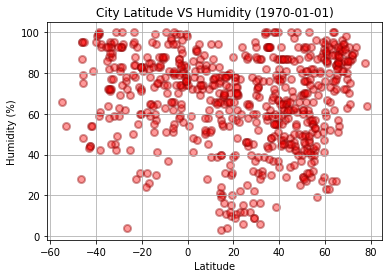

In [18]:
# Build the scatter plot
plt.scatter(weather_df.Lat,
            weather_df.Humidity, 
            alpha=0.4, 
            s=50, 
            c='red', 
            edgecolors="darkred", 
            linewidth=2)

# Incorporate the other graph properties
plt.grid()
# Create a legend
plt.title(f"City Latitude VS Humidity ({dateLabel})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [19]:
# Save Figure
plt.savefig('../Resources/humidity.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

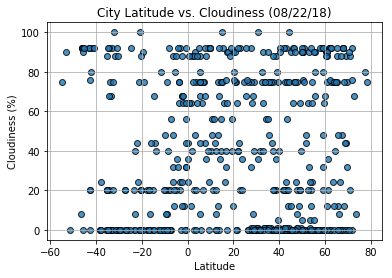

In [8]:
# NOTEBOOK EXAMPLE

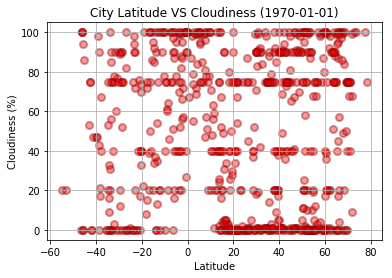

In [20]:
# Build the scatter plot
plt.scatter(weather_df.Lat,
            weather_df.Cloudiness, 
            alpha=0.4, 
            s=50, 
            c='red', 
            edgecolors="darkred", 
            linewidth=2)

# Incorporate the other graph properties
plt.grid()
# Create a legend
plt.title(f"City Latitude VS Cloudiness ({dateLabel})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [21]:
# Save Figure
plt.savefig('../Resources/cloudiness.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

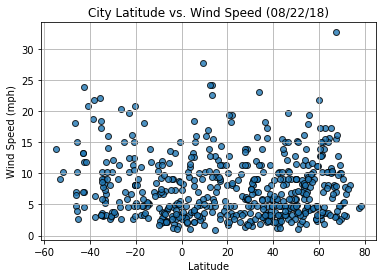

In [9]:
# NOTEBOOK EXAMPLE

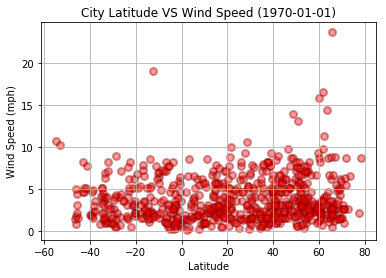

In [22]:
# Build the scatter plot
plt.scatter(weather_df.Lat,
            weather_df.Wind_Speed, 
            alpha=0.4, 
            s=50, 
            c='red', 
            edgecolors="darkred", 
            linewidth=2)

# Incorporate the other graph properties
plt.grid()
# Create a legend
plt.title(f"City Latitude VS Wind Speed ({dateLabel})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [23]:
# Save Figure
plt.savefig('../Resources/windSpeed.png')

<Figure size 432x288 with 0 Axes>